# Prompt
- 모델에 입력할 때 사용하는 템플릿
- chatGPT에게 질문을 할 때, 우리가 작성하는 것들 모두 프롬프트
- 모델이 정확한 답을 줄 수 있는지 크게 영향을 미치기 때문에 'prompt engineering'이라는 분야가 존재

# prompt engineering
LLM 선생님에게 '정확하고 유용한 답'을 받기 위해서 '잘 질문하는 방법'을 연구하는 분야
- 프롬프트 엔지니어링은 현재도 계속 연구 중이며, 유튜브에도 자료가 잘 나와있음

## [prompt engineering 잘하는 법 9가지](https://www.youtube.com/watch?v=GlvOHXJT_gI)
0. 구분자(""" """)를 이용해서 LLM에게 지시를 할 것을 구분해주면 더 잘 답변함
1. "결과를 보고서 형태의 줄글로 바꿔줘"라고 하면, 사용자가 더 보기 좋게 답변함
2. 프롬프트 지시를 위한 idation을 gpt와 상의하기도 함
3. 중요한 규칙은 영어 대문자로 하면 더 잘 알아들음
4. 한국어와 영어를 섞어 쓰는게 좋음
    - code switching : 대화 중에 두 개 이상의 언어를 번갈아 사용하는 현상
    - 제주도의 오메기떡처럼 로컬한 것은 한글, 나머지는 영어로 두면 중간에 언어가 달랐을 때 그부분을 llm이 더욱 잘 이해함
5. 사실과 견해를 구분받아 듣기 ({ } : 한정해서 말하라는 지시, 이 기호를 주면 더 분류해서 잘 말함)
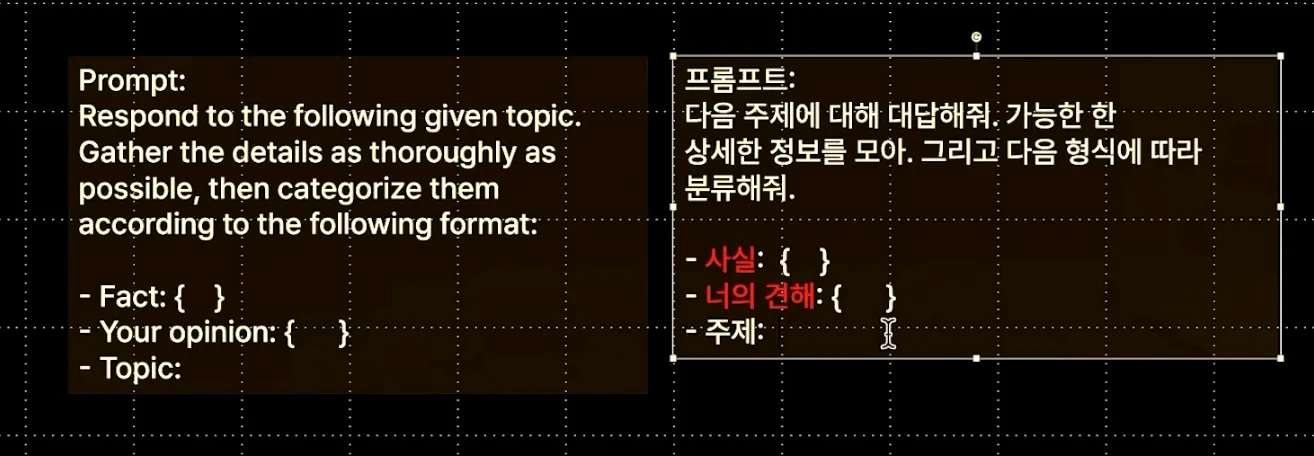
6. 인식론적 경사도(epistemic gradient) : 질문자와 답변자 간의 지식 수준 차이를 고려하여 질문의 난이도를 단계적으로 조절
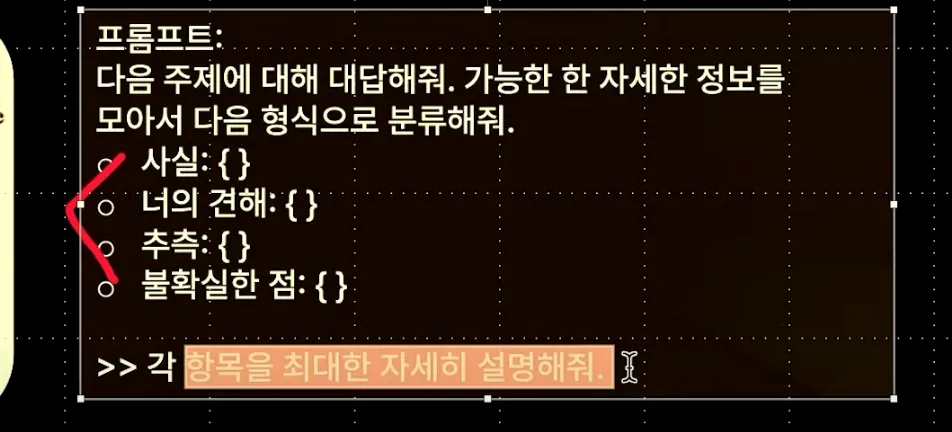
7. 띄어쓰기와 문단 나누기 등을 통해 구조화 되면 답변이 좋음 (json 형태로 주면, 정확성이 올라감)
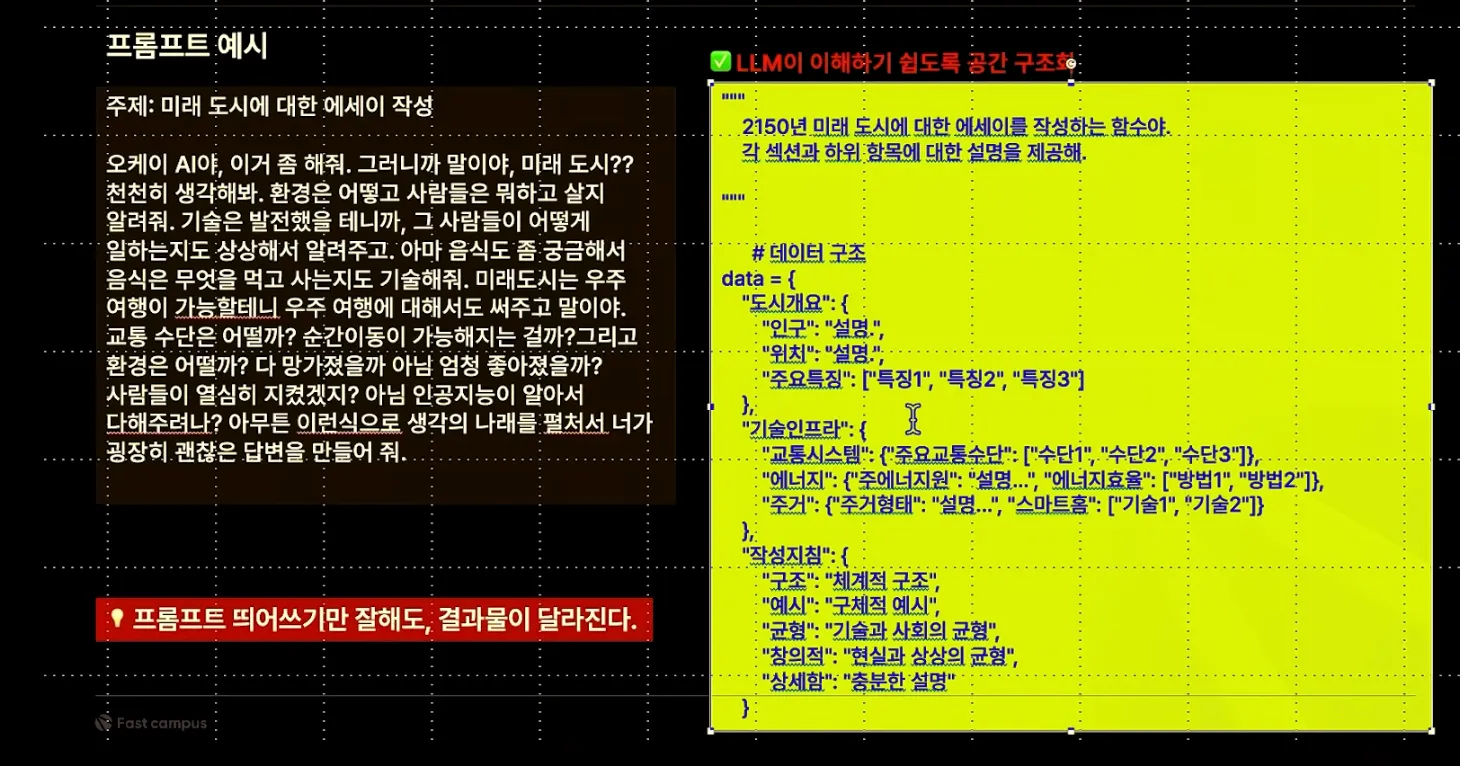
8. 자기검증(self-critic)을 하면, 결과물에 환각이 사라진다는 연구 결과가 있음
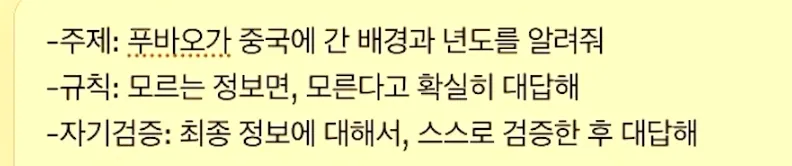


In [ ]:
%pip install -U langchain langchain-core langchain_openai

## PromptTemplate
- 프롬프트를 구성할 수 있는 템플릿
- Python의 문자열 포맷팅을 사용해서 동적으로 프롬프트를 구성할 수 있음

In [14]:
from langchain_core.prompts import PromptTemplate

# 'name'과 'job'라는 두 개의 변수를 사용하는 프롬프트 템플릿을 정의
template_text = "안녕하세요, 제 이름은 {name}이고, 직업은 {job} 입니다."
print(f"template_text : {template_text}")

# PromptTemplate 인스턴스를 생성
prompt_template = PromptTemplate.from_template(template_text)
print(f"prompt_template : {prompt_template}")

# 1. 템플릿에 값을 채워서 프롬프트를 완성 : 단순히 템플릿 문자열에 직접 값을 넣음
filled_prompt = prompt_template.format(name="민지", job="AI Engineer")
print(f"filled_prompt : {filled_prompt}")

# 2. 템플릿에 값을 채워서 프롬프트를 완성 : 
# invoke() : 프롬프트를 준비하고 바로 LLM이나 응답을 생성하기 위한 인터페이스로, 프롬프트 템플릿에 값을 넣어 바로 결과를 얻을 때 사용
# LangChain의 파이프라인과 긴밀하게 통합된 작업을 지원
filled_prompt = prompt_template.invoke({
    "name":"민지", "job":"AI Engineer"
})
print(f'filled_prompt : {filled_prompt}')
filled_prompt

template_text : 안녕하세요, 제 이름은 {name}이고, 직업은 {job} 입니다.
prompt_template : input_variables=['job', 'name'] input_types={} partial_variables={} template='안녕하세요, 제 이름은 {name}이고, 직업은 {job} 입니다.'
filled_prompt : 안녕하세요, 제 이름은 민지이고, 직업은 AI Engineer 입니다.
filled_prompt : text='안녕하세요, 제 이름은 민지이고, 직업은 AI Engineer 입니다.'


StringPromptValue(text='안녕하세요, 제 이름은 민지이고, 직업은 AI Engineer 입니다.')

 ### prompt_template 속성 : { }는 왜 비어있는거지?
    - input_variables : 프롬프트 템플릿에서 사용되는 변수 이름들을 저장
    - input_types : 각 변수의 데이터 타입을 지정할 수 있지만, 기본적으로는 빈 딕셔너리
    - partial_variables : 부분적으로 채워진 변수를 저장, 일부 변수에 대해 기본값을 미리 지정하여 템플릿을 생성 가능

prompt_template : input_variables=['job', 'name'] input_types={} partial_variables={} template='안녕하세요, 제 이름은 {name}이고, 직업은 {job} 입니다.'

- 결론 : 주로 문서화 용도로 사용되며, 실제로 값의 타입을 강제하거나 검증하지 않기 때문에 안해도 된다!


In [27]:
# 기본
prompt_template = PromptTemplate.from_template(
    "오늘은 날씨가 {weather}이고, 할 일은 {todo}입니다."
)
filled_prompt = prompt_template.invoke({ "weather":"맑음", "todo":"피크닉가기" })
print(f"filled_prompt : {filled_prompt}")


# partial_variables, input_types 지정해보기 (int로 잘못 지정해봄 -> 문제 없음)
prompt_template = PromptTemplate(
    input_variables=["weather", "todo"], # 변수 미리 지정(안해도 되지만, LangChain이 해당 변수들을 올바르게 인식하고 처리할 수 있게 하기 위함)
    template="오늘은 날씨가 {weather}이고, 할 일은 {todo}입니다.",
    partial_variables={"weather": "맑음", "todo": "피크닉가기"},  # 기본값 설정
    input_types={"weather": int, "todo": str}  # 변수 타입 지정
)

prompt_template

filled_prompt : text='오늘은 날씨가 맑음이고, 할 일은 피크닉가기입니다.'


PromptTemplate(input_variables=[], input_types={'weather': <class 'int'>, 'todo': <class 'str'>}, partial_variables={'weather': '맑음', 'todo': '피크닉가기'}, template='오늘은 날씨가 {weather}이고, 할 일은 {todo}입니다.')

### 프롬프트 템플릿 예제 정리 : 그냥 이렇게만 쓰면 된다!

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("안녕하세요, 제 이름은 {name}이고, 직업은 {job} 입니다.")
filled_prompt = prompt_template.invoke({ "name":"민지", "job":"AI Engineer" })
filled_prompt

StringPromptValue(text='안녕하세요, 제 이름은 민지이고, 직업은 AI Engineer 입니다.')

### 오.. PromptTemplate 결합도 된다
PromptTemplate 클래스는 문자열을 기반으로 프롬프트 템플릿을 생성하고, '+ 연산자'를 사용하여 직접 결합하는 동작을 지원
- 문자열 + 문자열
- PromptTemplate + PromptTemplate
- PromptTemplate + 문자열


In [29]:
# 문자열 템플릿 결합 (PromptTemplate + PromptTemplate + 문자열)
combined_prompt = (
            prompt_template
            + PromptTemplate.from_template("\n\n저는 오늘도 배가 고픕니다. 맛있는걸 먹을거에요!!")
            + "\n\n{language}로 번역해주세요."
)

print(f"combined_prompt : {combined_prompt}")
combined_prompt.invoke({ "name":"민지", "job":"AI Engineer", "language":"한국어" })

combined_prompt : input_variables=['language'] input_types={} partial_variables={'weather': '맑음', 'todo': '피크닉가기'} template='오늘은 날씨가 {weather}이고, 할 일은 {todo}입니다.\n\n저는 오늘도 배가 고픕니다. 맛있는걸 먹을거에요!!\n\n{language}로 번역해주세요.'


StringPromptValue(text='오늘은 날씨가 맑음이고, 할 일은 피크닉가기입니다.\n\n저는 오늘도 배가 고픕니다. 맛있는걸 먹을거에요!!\n\n한국어로 번역해주세요.')

# ChatPromptTemplate
- 대화형 모델이나 챗봇 개발에 주로 사용됨
- 대화형 상황에서 여러 메시지 입력을 기반으로 단일 메시지 응답을 생성
- input : 여러 타입의 메시지를 원소로 갖는 list로 구성되며, 각 메시지는 role(역할)과 content(내용)로 구성됨

## ChatPromptTemplate Message 유형
- SystemMessage : 모델에게 지침 제공 (예시 : 당신은 친절한 영어 선생님이다.)
- HumanMessage : 사용자의 입력 메시지 (예시 : 안녕을 영어로 하면?)
- AIMessage : 사용자의 요청에 대한 응답 제공 (예시 : hello)

### SystemMessage 예시

In [36]:
from langchain_core.messages import SystemMessage
from langchain_core.prompts import ChatPromptTemplate

# ChatPromptTemplate 인스턴스 생성
messages = [
    SystemMessage(content="당신은 친절한 영어 선생님이다."),
]
chat_prompt = ChatPromptTemplate.from_messages(messages)
chat_prompt

ChatPromptTemplate(input_variables=[], input_types={}, partial_variables={}, messages=[SystemMessage(content='당신은 친절한 영어 선생님이다.', additional_kwargs={}, response_metadata={})])

In [37]:
print(f"chat_prompt.messages : {chat_prompt.messages}")
print(f"chat_prompt.messages[0].content : {chat_prompt.messages[0].content}")

chat_prompt.messages : [SystemMessage(content='당신은 친절한 영어 선생님이다.', additional_kwargs={}, response_metadata={})]
chat_prompt.messages[0].content : 당신은 친절한 영어 선생님이다.


### HumanMessage 예시

In [39]:
from langchain_core.prompts import HumanMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content="당신은 친절한 영어 선생님이다."),
        HumanMessagePromptTemplate.from_template("{user_input}"),
    ]
)
chat_template

ChatPromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, messages=[SystemMessage(content='당신은 친절한 영어 선생님이다.', additional_kwargs={}, response_metadata={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, template='{user_input}'), additional_kwargs={})])

In [51]:
chat_template.messages[0].content


'당신은 친절한 영어 선생님이다.'

In [49]:
chat_template.invoke({"user_input": "안녕이 영어로 뭔가요?"})

ChatPromptValue(messages=[SystemMessage(content='당신은 친절한 영어 선생님이다.', additional_kwargs={}, response_metadata={}), HumanMessage(content='안녕이 영어로 뭔가요?', additional_kwargs={}, response_metadata={})])

## ChatPromptTemplate 예제 정리
HumanMessage vs HumanMessagePromptTemplate
- HumanMessage : 사용자의 입력 메시지 (직접 메시지로 전달)
- HumanMessagePromptTemplate : 사용자의 입력 메시지를 템플릿화한 것 (변수로 입력받을 수 있고, 다양한 입력에 대해 템플릿 재사용 가능)


In [56]:
from langchain_core.messages import SystemMessage
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content="당신은 친절한 영어 선생님이다."),
        HumanMessagePromptTemplate.from_template("{user_input}"),
    ]
)
chat_template.format_messages(user_input="안녕이 영어로 뭔가요?")

[SystemMessage(content='당신은 친절한 영어 선생님이다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='안녕이 영어로 뭔가요?', additional_kwargs={}, response_metadata={})]

## [PromptTemplate, ChatPromptTemplate] 
### .format, .format_messages, .invoke 차이

### format
- 용도: 프롬프트 템플릿에 값을 채워 단일 문자열을 반환
- 특징: 템플릿에 {}로 표시된 변수 자리에 값을 넣고, 완성된 문자열만 반환. 이를 통해 값이 채워진 최종 텍스트를 확인 가능
-  사용 사례: 템플릿 자체가 필요한 상황이 아니라, 완성된 텍스트만 필요한 경우.

In [57]:
prompt_template = PromptTemplate(
    input_variables=["name"],
    template="안녕하세요, {name}님! 오늘은 무엇을 도와드릴까요?"
)
formatted_text = prompt_template.format(name="민지")
print(formatted_text)  # 출력: "안녕하세요, 민지님! 오늘은 무엇을 도와드릴까요?"

안녕하세요, 민지님! 오늘은 무엇을 도와드릴까요?


### format_messages
- 용도: 여러 메시지 템플릿을 포맷하여 메시지 객체 리스트를 반환
- 특징: ChatPromptTemplate에서 여러 메시지에 값을 넣고, 각 메시지를 객체(SystemMessage, HumanMessage 등)로 반환
- 사용 사례: 채팅 시스템에서 여러 메시지를 한꺼번에 포맷해야 할 때, 예를 들어 챗봇의 대화 흐름을 구성할 때 유용합니다.

In [72]:
from langchain_core.prompts import HumanMessagePromptTemplate, SystemMessagePromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("당신은 친절한 {subject} 선생님입니다."),
    HumanMessagePromptTemplate.from_template("오늘의 일정은 무엇인가요, {name}?")
])

formatted_messages = chat_prompt.format_messages(subject="영어", name="민지")
formatted_messages

[SystemMessage(content='당신은 친절한 영어 선생님입니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='오늘의 일정은 무엇인가요, 민지?', additional_kwargs={}, response_metadata={})]

### invoke
- 용도: 템플릿에 값을 채워 바로 최종 응답을 생성
- 특징: LangChain 파이프라인에서 템플릿에 값을 넣어 바로 LLM 호출을 위해 사용 가능
- 단순히 프롬프트 템플릿을 포맷하는 것이 아니라, LLM과의 상호작용까지 포함해 완성된 프롬프트를 입력으로 사용하여 결과를 반환
- 사용 사례: 템플릿을 준비하고 바로 응답 결과를 얻고자 할 때 유용합니다.

In [73]:
from langchain_core.prompts import HumanMessagePromptTemplate, SystemMessagePromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("당신은 친절한 {subject} 선생님입니다."),
    HumanMessagePromptTemplate.from_template("오늘의 일정은 무엇인가요, {name}?")
])

formatted_messages = chat_prompt.invoke({"subject":"영어", "name":"민지"})
formatted_messages

ChatPromptValue(messages=[SystemMessage(content='당신은 친절한 영어 선생님입니다.', additional_kwargs={}, response_metadata={}), HumanMessage(content='오늘의 일정은 무엇인가요, 민지?', additional_kwargs={}, response_metadata={})])

### 차이점 요약
- .format: 템플릿에 값을 채워 완성된 단일 문자열을 반환합니다.
- .format_messages: 여러 메시지에 값을 채워 메시지 객체 리스트를 반환합니다.
- .invoke: 템플릿에 값을 채운 후 LLM을 호출하여 최종 응답을 반환합니다.